In [35]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lenovo\Downloads\new\student_habits_performance (2).csv") 
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [2]:
df.drop(columns = ['student_id'],inplace = True)	

In [3]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [4]:
df.dtypes


age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [5]:
df.isnull().sum()

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
df.isnull().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

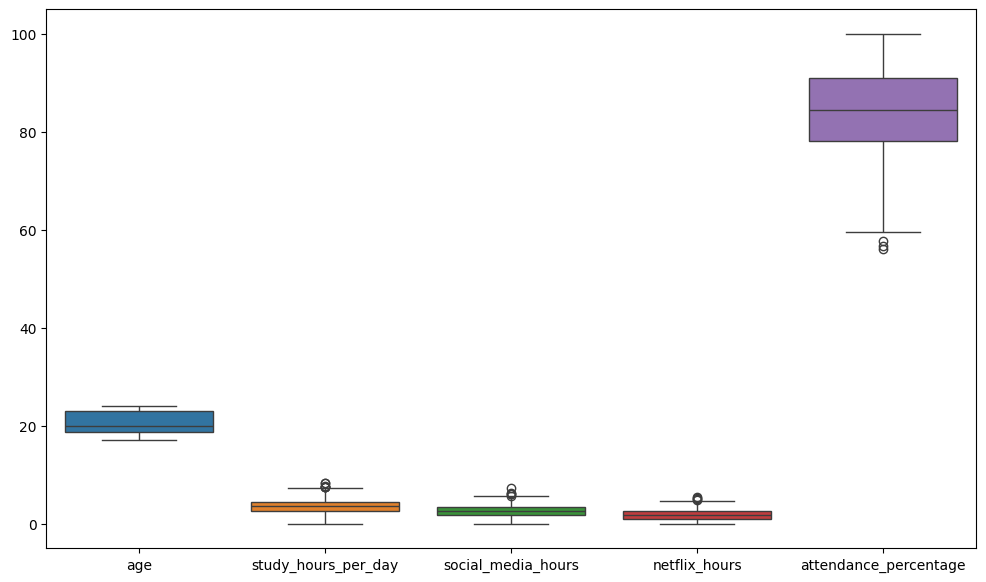

In [7]:
#outlier treatment
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
sns.boxplot(data = df[['age', 'study_hours_per_day', 'social_media_hours','netflix_hours','part_time_job', 'attendance_percentage',
]])
plt.show()


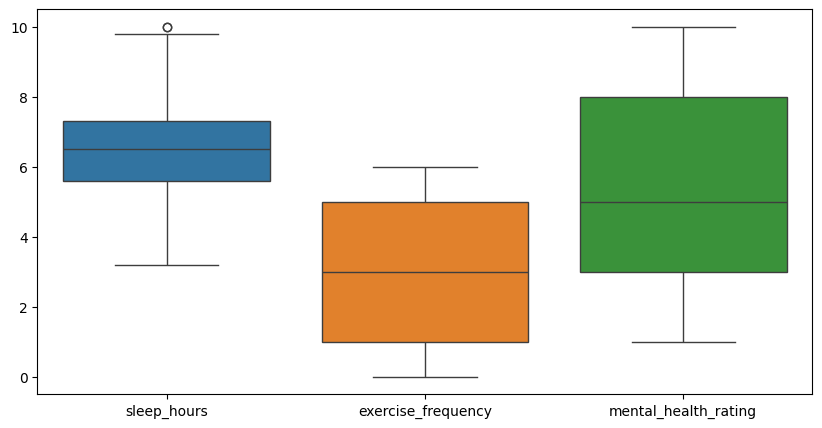

In [8]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df[['sleep_hours', 'exercise_frequency','mental_health_rating']])
plt.show()


In [9]:
# so there is no much specific outliers to deal with

FEATURE SELECTION

In [10]:
# lets remove constant features to reduce the overfitting
x = df.drop(columns = ['exam_score'])
y = df[['exam_score']]
df1 = x.select_dtypes(include = ['int64','float64'])           
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(df1)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
# so here no feature wich is constant 

In [12]:
# lets remove features which are highly correlated to decrease the dimensions
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.3,random_state = 42)
x_train



,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
541,18,4.2,3.8,3.4,84.8,5.4,2,5
440,17,3.2,0.2,0.9,100.0,6.9,4,5
482,21,3.4,1.5,0.7,79.3,7.1,1,1
422,22,2.0,2.4,3.9,66.9,4.1,3,2
778,24,5.1,0.5,1.4,88.9,4.1,4,8
...,...,...,...,...,...,...,...,...
106,22,3.3,0.4,0.8,83.3,9.1,6,4
270,22,4.0,3.2,2.3,96.6,6.0,4,3
860,20,3.6,3.9,4.2,100.0,8.3,1,8
435,24,2.0,0.0,3.1,73.7,6.3,6,3


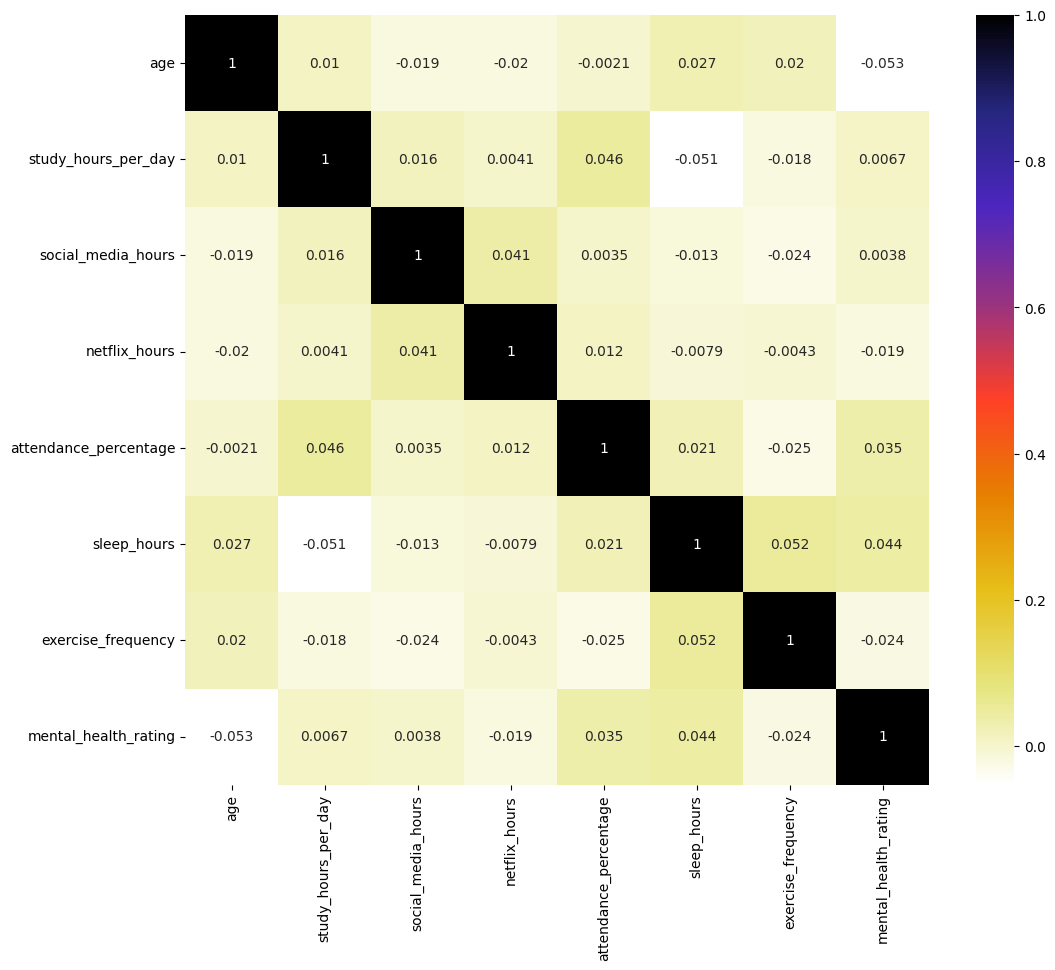

In [13]:
plt.figure(figsize =(12,10))
cor = x_train.corr()
sns.heatmap(cor,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()


In [14]:
# so there is no features correlated with each other above 70 percent

In [15]:
# lets see how closely each feature is correlated with the target variable
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train,y_train)
mutual_info

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.03913758, 0.57720869, 0.03906184, 0.01975203, 0.00211804,
       0.03463885, 0.01612163, 0.11218719])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

study_hours_per_day      0.577209
mental_health_rating     0.112187
age                      0.039138
social_media_hours       0.039062
sleep_hours              0.034639
netflix_hours            0.019752
exercise_frequency       0.016122
attendance_percentage    0.002118
dtype: float64

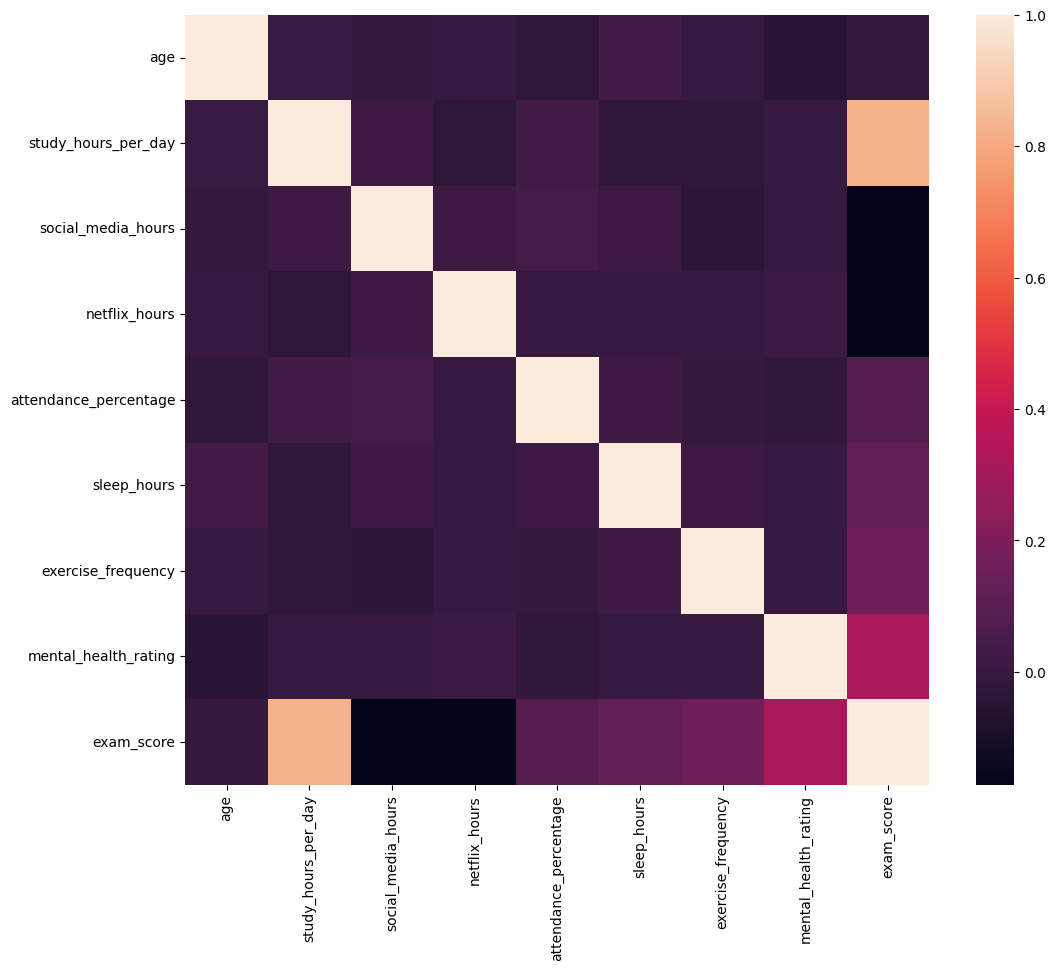

In [17]:
plt.figure(figsize = (12,10))
df2 = df.select_dtypes(include =['int64','float64'])
cor1 = df2.corr()
sns.heatmap(cor1)
plt.show()

In [18]:
# so now lets select only top 5 features which are highly correlated with target variable and remove remaining
df.drop(columns = ['netflix_hours','attendance_percentage'],inplace = True,axis = 1)     
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'part_time_job', 'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [19]:
# now lets filer our categorical features using Anova F-test
from sklearn.feature_selection import f_regression ,SelectKBest
X = df.select_dtypes(include = ['object'])
Y = df['exam_score'].values.ravel()
X_encoded = pd.get_dummies(X,drop_first = True)

In [20]:
selector = SelectKBest(score_func = f_regression,k = 'all')
selector.fit(X_encoded,y)
f_scores = pd.Series(selector.scores_,index = X_encoded.columns) 
p_values = pd.Series(selector.pvalues_,index = X_encoded.columns)
f_scores
p_values
results = pd.DataFrame({'F-Score': f_scores,'P-Score': p_values}).sort_values(by = 'F-Score',ascending = False)
results

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-Score,P-Score
internet_quality_Good,2.582520,0.108366
diet_quality_Poor,1.730219,0.188685
parental_education_level_Master,1.613581,0.204285
part_time_job_Yes,0.707095,0.400611
gender_Male,0.173686,0.676946
gender_Other,0.168073,0.681918
diet_quality_Good,0.117660,0.731658
internet_quality_Poor,0.009077,0.924116
parental_education_level_High School,0.004583,0.946041
extracurricular_participation_Yes,0.000774,0.977810


In [22]:
# the lesser the p value thhe more importance the feature
# so lets consider only top 4 columns and remove remaining categorical columns
df.drop(columns =['extracurricular_participation'],inplace = True)
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'part_time_job', 'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'exam_score'],
      dtype='object')

In [23]:
# so totally we have remove the columns'extracurricular_participation','netflix_hours','attendance_percentage' to reduce... 
#...dimensionality using feature selction

Model Building

it is a regression model

In [24]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['exam_score'])
y = df[['exam_score']]
x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.3,random_state = 42)
x_train

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
541,18,4.2,3.8,3.4,84.8,5.4,2,5
440,17,3.2,0.2,0.9,100.0,6.9,4,5
482,21,3.4,1.5,0.7,79.3,7.1,1,1
422,22,2.0,2.4,3.9,66.9,4.1,3,2
778,24,5.1,0.5,1.4,88.9,4.1,4,8
...,...,...,...,...,...,...,...,...
106,22,3.3,0.4,0.8,83.3,9.1,6,4
270,22,4.0,3.2,2.3,96.6,6.0,4,3
860,20,3.6,3.9,4.2,100.0,8.3,1,8
435,24,2.0,0.0,3.1,73.7,6.3,6,3


In [26]:
# first convert the categorical feature to numerical featre using encoding technique
 
df['gender'] = df['gender'].map({'Female' : 1,'Male': 0}) 
df['diet_quality'] = df['diet_quality'].map({'Fair' : 1,'Good': 2,'Poor':0}) 
df['parental_education_level'] = df['parental_education_level'].map({'Master': 2,'Bachelor':1,'High School':0})
df['internet_quality'] = df['internet_quality']. map({'Average' : 1,'Good': 2,'Poor':0}) 

In [27]:
df

,age,gender,study_hours_per_day,social_media_hours,part_time_job,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score
0,23,1.0,0.0,1.2,No,8.0,1,6,2,1,8,56.2
1,20,1.0,6.9,2.8,No,4.6,2,6,0,1,8,100.0
2,21,0.0,1.4,3.1,No,8.0,0,1,0,0,1,34.3
3,23,1.0,1.0,3.9,No,9.2,0,4,2,2,1,26.8
4,19,1.0,5.0,4.4,No,4.9,1,3,2,2,1,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,1.0,2.6,0.5,No,7.5,1,2,0,2,6,76.1
996,17,1.0,2.9,1.0,Yes,6.8,0,1,0,1,6,65.9
997,20,0.0,3.0,2.6,No,6.5,2,5,1,2,9,64.4
998,24,0.0,5.4,4.1,Yes,7.6,1,0,1,1,1,69.7


In [28]:
# regression is a scale dependent alagorithm so we need to standardize it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[-1.09362804,  0.44980319,  1.10521365, ..., -0.85730831,
        -0.54575029, -0.1844009 ],
       [-1.52760743, -0.23319515, -1.95840796, ...,  0.36128344,
         0.45300841, -0.1844009 ],
       [ 0.2083101 , -0.09659548, -0.85210015, ...,  0.52376234,
        -1.04512963, -1.59127426],
       ...,
       [-0.22566928,  0.04000419,  1.19031426, ...,  1.49863574,
        -1.04512963,  0.87075412],
       [ 1.51024825, -1.05279316, -2.12860916, ..., -0.12615326,
         1.4517671 , -0.88783758],
       [-1.09362804,  0.51810303,  1.27541486, ...,  0.84872014,
        -1.54450898, -1.59127426]], shape=(700, 8))

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [30]:
mean_squared_value = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv= 5)
mean_squared_value

array([-25.06652878, -24.82719264, -30.44578318, -28.71078854,
       -37.98694288])

In [31]:
import numpy as np
np.mean(mean_squared_value)

np.float64(-29.40744720387658)

In [32]:
# now lets predict
y_pred= regression.predict(x_test)
pd.DataFrame(y_pred)

,0
0,66.438797
1,74.824270
2,78.422311
3,74.603377
4,61.524044
...,...
295,65.354402
296,59.474289
297,53.028067
298,77.065112


In [33]:
# so finally these are the predicted vlues of our model

Accuracy of model

In [34]:
from sklearn.metrics import mean_absolute_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mean absolute error :' ,mae)
print('R2 score :' ,r2)

mean absolute error : 4.229445241943834
R2 score : 0.8983545515482991


In [1]:
# so our model has almost 90% accuracy which is sign of a good model